<a href="https://colab.research.google.com/github/phoebegunawan/Phoebe_INFO4670_Spring2026/blob/main/assignmentgunawan_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Quality Check

1.1 Using Python (pandas, matplotlib, or seaborn), load and inspect the Assignment 2 dataset.

In [ ]:
# Phoebe Gunawan
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Assignment 2 dataset.csv")

# data distribution
df.head()
df.info()
df.describe(include= 'all')
df.isnull().sum()



Saving Assignment 2 dataset.csv to Assignment 2 dataset (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Column 1      18254 non-null  int64  
 1   Date          18254 non-null  object 
 2   AveragePrice  18254 non-null  float64
 3   Total Volume  18253 non-null  float64
 4   4046          18252 non-null  float64
 5   4225          18253 non-null  float64
 6   4770          18253 non-null  float64
 7   Total Bags    18253 non-null  float64
 8   Small Bags    18252 non-null  float64
 9   Large Bags    18252 non-null  float64
 10  XLarge Bags   18253 non-null  float64
 11  type          18253 non-null  object 
 12  year          18254 non-null  int64  
 13  region        18254 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


,0
Column 1,0
Date,0
AveragePrice,0
Total Volume,1
4046,2
4225,1
4770,1
Total Bags,1
Small Bags,2
Large Bags,2


Write code to explore the data distribution (e.g., region, type, year) and check whether there is any bias. Provide both the code and your interpretation.

In [ ]:
df.head()


,Column 1,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
#grouping by the region adn the sums of the small abgs
small_Bag_By_Region = (
    df.groupby("region")["Small Bags"]
    .sum()
    .sort_values(ascending = False)
)

#show only the top 10 regions to take a smaller sample size
small_Bag_By_Region.head(10)


,Small Bags
region,
TotalUS,1.243561e+09
California,2.290977e+08
West,2.227093e+08
SouthCentral,1.848155e+08
Northeast,1.736230e+08
LosAngeles,1.557261e+08
Midsouth,1.343644e+08
GreatLakes,1.232875e+08
Southeast,1.069033e+08


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtricks'

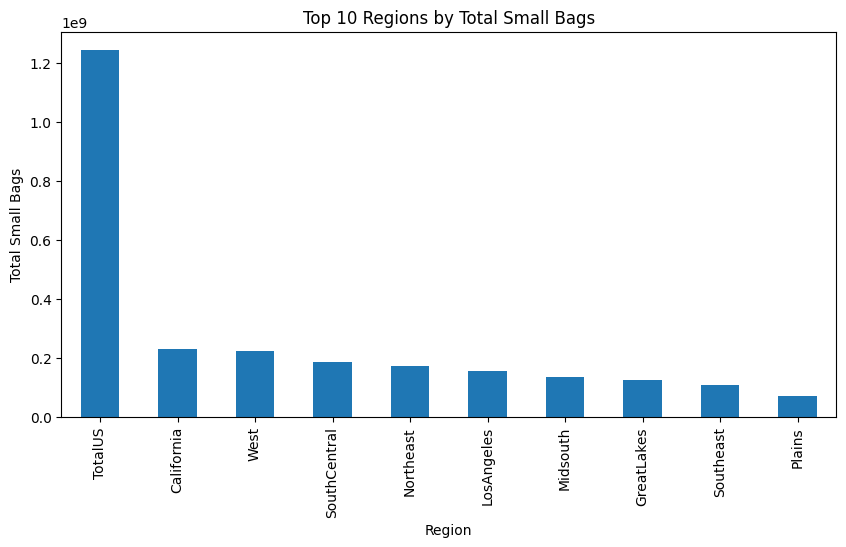

In [ ]:
top10 = small_Bag_By_Region.head(10)

#setting the size of the bar graph
top10.plot(kind = "bar", figsize=(10,5))

# titles on the graph
plt.title("Top 10 Regions by Total Small Bags")
plt.xlabel("Region")
plt.ylabel("Total Small Bags")

#rotate labels so they don't overlap and aligning text
plt.xtricks(rotation= 45, ha= "right")

# spacing
plt.tight_layout()

#show
plt.show()

'''
As seen on the printed graph we see the totalUS has
the highest sum of total bags while california, west, etc.
this shows how inaccurate this dataset is and how it needs to be cleaned

'''

1.2 Write Python code to check for duplicate rows and missing values in the dataset. Show the number of duplicates and missing values for each column. Then, explain (in comments or markdown) how you would handle these issues (e.g., drop, impute, or replace).

In [ ]:
## missing values
missing_values = df.isnull().sum()

## display missing value per column

print("\nMissing values per column:")
display(missing_values)
'''
How I would handle this is by dropping the columns with 0
I would drop column1, dare avergae price etc.
I would also consider dropping 4046,4225, 4770 these values
do not show meaning in the data set so it is unknown because of mislabeling
'''


Missing values per column:


,0
Column 1,0
Date,0
AveragePrice,0
Total Volume,1
4046,2
4225,1
4770,1
Total Bags,1
Small Bags,2
Large Bags,2


'\nHow I would handle this is by dropping the columns with 0 \nI would drop column1, dare avergae price etc. \nI would also consider dropping 4046,4225, 4770 these values\ndo not show meaning in the data set so it is unknown because of mislabeling\n'

In [ ]:
# Write your code here

## shwoing the number of duplicated rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicated rows: ", num_duplicates)
display(num_duplicates)
'''
 For the duplicated rows I will check the data set before dropping the data
 Duplicates could also indicate 2 of a data but it could still be relivant
 I would check if I need this data or if it can be ignored
 if neither of those statments apply I would drop
'''

Number of Duplicated rows:  2


np.int64(2)

'\n For the duplicated rows I will check the data set before dropping the data \n Duplicates could also indicate 2 of a data but it could still be relivant \n I would check if I need this data or if it can be ignored \n if neither of those statments apply I would drop \n'

1.3 Use Python code to print the number of rows and columns in the dataset (e.g., with df.shape). Based on the dataset size, explain (briefly) whether you think the dataset is sufficient for training a machine learning model.

In [ ]:
# Write your code here

rows, columns = df.shape

print("Number of rows:", rows)
print("Number of columns: ", columns)

"""
Based on the rows and columns of the data set I believe this dataset is
sufficient enough based on the rows of data in this dataset and the amount of
columns diversifying the data set
"""

Number of rows: 18254
Number of columns:  14


'\nBased on the rows and columns of the data set I believe this dataset is\nsufficient enough based on the rows of data in this dataset and the amount of\ncolumns diversifying the data set\n'

#2. Data Cleaning and Preprocessing

2.1 Remove the first column or “Column 1” from the dataset. Treat the ‘year’ variable as nominal.

In [ ]:
# Write your code here

# remove the first column(column 1)
df = df.drop(df.columns[0], axis=1)

# years to a string
df['year'] = df['year'].astype(str)

df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12-27-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12-20-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12-13-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12-6-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11-29-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


2.2 Check for duplicate values and remove them.

In [ ]:
## showing the number of duplicated rows
num_duplicates = df.duplicated().sum()
print("Number of Duplicated rows: ", num_duplicates)
df = df.drop_duplicates()

Number of Duplicated rows:  2


In [ ]:
# Write your code here
## showing new duplicates
num_duplicates = df.duplicated().sum()
print("Number of Duplicated rows: ", num_duplicates)

Number of Duplicated rows:  0


2.3 Check for missing values. If a data record (row) only has a few missing values, replace the missing values with the median of the column feature in that specific “Region” variable. If most column values in a data record are missing, remove the data record.

In [ ]:


## missing values
missing_values = df.isnull().sum()

## display missing value per column

print("\nMissing values per column:")
display(missing_values)





Missing values per column:


,0
Date,0
AveragePrice,0
Total Volume,1
4046,2
4225,1
4770,1
Total Bags,1
Small Bags,2
Large Bags,2
XLarge Bags,1


In [ ]:
# counting missing value per the column
missing_values = df.isnull().sum()

print("\nMissing values per column: ")
display(missing_values)

df = df.loc[:, missing_values > 0]

# checking columns
print("/nColumns: ")
df.columns



Missing values per column: 


,0
Total Volume,1
4046,2
4225,1
4770,1
Total Bags,1
Small Bags,2
Large Bags,2
XLarge Bags,1
type,1


/nColumns: 


Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

2.4 Find the correlation between the variables and describe how the correlated values among the variables impact the model accuracy.


AttributeError: module 'matplotlib.pyplot' has no attribute 'xtricks'

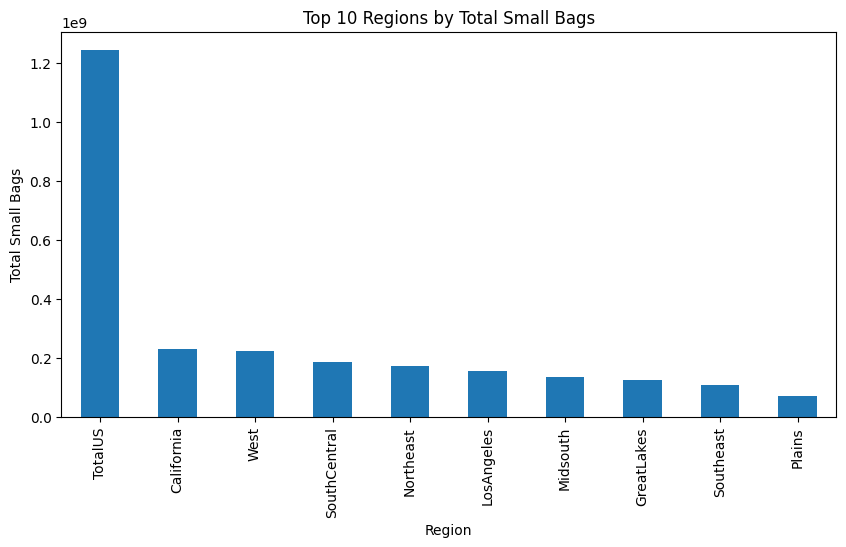

In [ ]:
# Write your code here
df.head()
top10 = small_Bag_By_Region.head(10)

#setting the size of the bar graph
top10.plot(kind = "bar", figsize=(10,5))

# titles on the graph
plt.title("Top 10 Regions by Total Small Bags")
plt.xlabel("Region")
plt.ylabel("Total Small Bags")

#rotate labels so they don't overlap and aligning text
plt.xtricks(rotation= 45, ha= "right")

# spacing
plt.tight_layout()

#show
plt.show()

"""
In the bar chart is displays the graph of small bags after removing the zeros
you can see the corolation and comaprison between the regions
"""

#3. Exploratory Data Analysis (EDA)


3.1 Describe the variables
- Describe all variables in the dataset.
- For continuous variables: report **range (min, max), mean, median, and distribution**.
- For categorical variables: list unique values.

In [ ]:
# Write your code here

# contious variable
numeric_cols = df.select_dtypes(include= 'number').columns

summary = df[numeric_cols].describe()

summary.loc["median"] = df[numeric_cols].median()
display(summary)

"""
This prints the mean, median and max min for each row
"""

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1.825100e+04,1.825000e+04,1.825100e+04,1.825100e+04,1.825100e+04,1.825000e+04,1.825000e+04,18251.000000
mean,8.505523e+05,2.929924e+05,2.951225e+05,2.283727e+04,2.396140e+05,1.821852e+05,5.433511e+04,3106.086096
std,3.453367e+06,1.264956e+06,1.204058e+06,1.074584e+05,9.861913e+05,7.461592e+05,2.439596e+05,17691.955036
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.084067e+04,8.542100e+02,3.008325e+03,0.000000e+00,5.089525e+03,2.850323e+03,1.274475e+02,0.000000
50%,1.073542e+05,8.643200e+03,2.905673e+04,1.849900e+02,3.973853e+04,2.635161e+04,2.647270e+03,0.000000
75%,4.329430e+05,1.110087e+05,1.501258e+05,6.240690e+03,1.107789e+05,8.333621e+04,2.201828e+04,132.365000
max,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000
median,1.073542e+05,8.643200e+03,2.905673e+04,1.849900e+02,3.973853e+04,2.635161e+04,2.647270e+03,0.000000


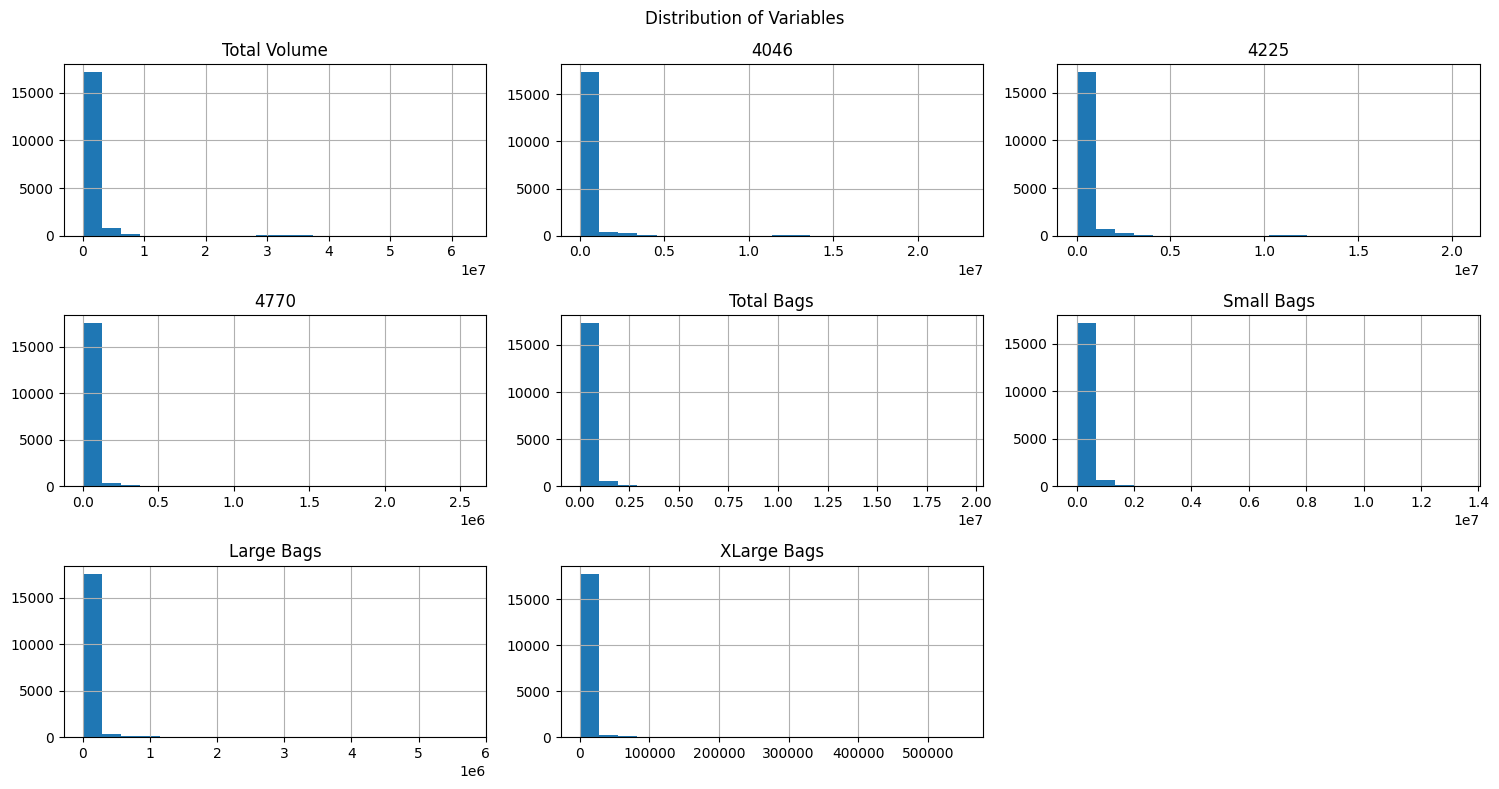

In [ ]:
#idstrubtion bar graph
df[numeric_cols].hist(bins= 20, figsize=(15,8))
plt.suptitle("Distribution of Variables")

plt.tight_layout()
plt.show()

# shows the distrubtion for column

In [ ]:
# Categorical

categorical_cols = df.select_dtypes(exclude='number').columns
#unique val
for col in categorical_cols:
  print(f"\nUnique value in '{col}': ")
  print(df[col].unique())

  #lists the unique values



Unique value in 'type': 
['conventional' 'organic' nan]


3.2 Inspect the earliest recorded date
- Find the earliest `Date`.
- Check if there are avocado prices recorded from the earliest date up to 2010.
- Comment: does the earliest data point look reasonable? Keep or remove?

In [ ]:

# Write your code here
df = pd.read_csv("Assignment 2 dataset.csv")
# earliest date
df['Date'] = pd.to_datetime(df['Date'])
earliest_date = df['Date'].min()
earliest_date
"""
the earliest date does not look resonable becasue it was back in 1904
unless we are looking at data taken place of all time to use and analyze
but this data was taken over a centurey ago. I would remove it.
"""

Timestamp('1904-01-21 00:00:00')

In [ ]:
#filter data up to 2010
data_up_to_2010 = df[df['year'] <= 2010]

#number of records
data_up_to_2010.shape

(1, 14)

3.3 Highest average price
- Find the highest value in "AveragePrice".
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here

# highest avg price val
max_price = df["AveragePrice"].max()

#find the row where avg price is the highest
highest_price_region = df[df["AveragePrice"] == max_price][["region", "AveragePrice"]]

# print and display
print("Highest AveragePrice: ", max_price)
display(highest_price_region)

"""
How I obtained these results was but taking the max of the average price which
is the highest value
"""


Highest AveragePrice:  3.25


,region,AveragePrice
14125,SanFrancisco,3.25


3.4 Highest total volume
- Find the highest total volume of avocados.
- Report which region it belongs to.
- Describe how you obtained the result.

In [ ]:
# Write your code here
max_volume= df["Total Volume"].max()
highest_volume_region = df[df["Total Volume"] == max_volume][["region", "Total Volume"]]

# print and display
print("Highest total Volume:", max_volume)
display(highest_volume_region)

"""
To obtain the highest Volume I found the max of the volume which is the
highest volume.
"""


Highest total Volume: 62505646.52


,region,Total Volume
9097,TotalUS,62505646.52


'\nTo obtain the highest Volume I found the max of the volume which is the \nhighest volume.\n'